In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [55]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

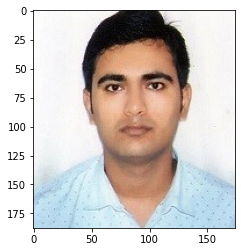

In [56]:
filename = "x.jpg"
img=read_file(filename)

In [57]:
def edge_mask(img, line_size, blur_value):
    """
    input: Input Image
    Output: Edges of Images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges

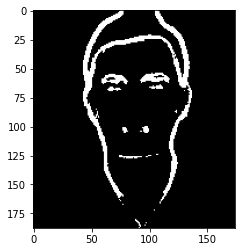

In [58]:
line_size, blur_value = 9,9
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap = "binary")
plt.show()

In [59]:
def color_quantization(img, k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret , label , center = cv2.kmeans(data, k, None, criteria, 10 ,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

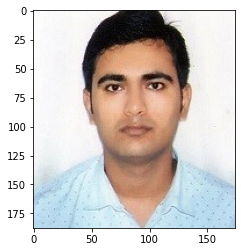

In [60]:
img_quantiz = color_quantization(img , k=5)

plt.imshow(img)
plt.show()

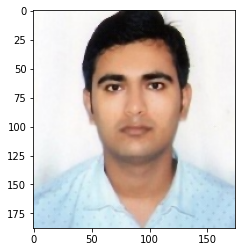

In [61]:
blurred = cv2.bilateralFilter(img, d=2, sigmaColor= 200, sigmaSpace= 400)
plt.imshow(blurred)
plt.show()

In [62]:
def cartoon():
    c=cv2.bitwise_and(blurred, blurred, mask= edges)
    plt.imshow(c)
    plt.title("Cart")
    plt.show()
    

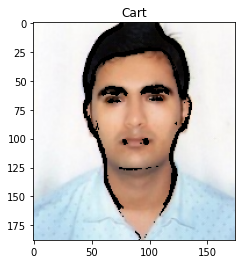

In [63]:
cartoon()